# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [6]:
print(heroes_df.shape)
print(heroes_df.info())
heroes_df.head(3)

(734, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
Unnamed: 0    734 non-null int64
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB
None


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0


In [7]:
print(powers_df.shape)
print(powers_df.info())
powers_df.head(3)

(667, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [12]:
heroes_df.drop(heroes_df.columns[0], axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [25]:
print(heroes_df.info())
print(heroes_df.isna().sum())
print(heroes_df['Publisher'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
ABC Studios            4
Icon Comics 

In [31]:
print(powers_df.info())
print(powers_df.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None
Omniscient                      0
Element Control                 0
Reflexes                        0
Enhanced Memory                 0
Summoning                       0
Projection                      0
Fire Control                    0
Electrical Transport            0
Astral Projection               0
Phasing                         0
Camouflage                      0
Omnipresent                     0
Immortality                     0
Peak Human Condition            0
Shapeshifting                   0
Power Sense                     0
Dimensional Travel              0
Clairvoyance                    0
Jump                            0
Hyperkinesis                    0
Invulnerability                 0
Energy Constructs               0
Force Fields                    0
Self-Sustenance                 0
Enhance

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [43]:
cleaned_heroes = heroes_df.dropna(how='any')
cleaned_heroes.isnull().sum().value_counts()
cleaned_heroes.shape

# The above created a new datafram called cleaned_heroes which dropped all rows that contained any NaN values,
# which is why it went from a shape of 734 x 10 to 734 x 10. The columns stayed the same because the default option
# frop dropna() is axis=0 which means rows. We also set this as a separate dataframe in case this was too drastic of
# approach. 

(719, 10)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [44]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [45]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# It is best to join on the name of the hero. So, in this case, you would join on heroes_df['name'] and 
# powers_df[hero_names].

In [48]:
powers_df.rename(columns={'hero_names' : 'name'}, inplace=True)
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
merged = pd.merge(heroes_df, powers_df, how='outer', on='name')
print(merged.shape)
merged.head()

(758, 177)


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [105]:
merged.isna().sum().sort_values(ascending=False)

Omniscient                      74
Element Control                 74
Reflexes                        74
Enhanced Memory                 74
Summoning                       74
Projection                      74
Fire Control                    74
Electrical Transport            74
Astral Projection               74
Phasing                         74
Camouflage                      74
Insanity                        74
Immortality                     74
Peak Human Condition            74
Shapeshifting                   74
Power Sense                     74
Dimensional Travel              74
Clairvoyance                    74
Jump                            74
Hyperkinesis                    74
Invulnerability                 74
Energy Constructs               74
Force Fields                    74
Self-Sustenance                 74
Enhanced Hearing                74
Power Absorption                74
Omnipresent                     74
Mind Control                    74
Precognition        

In [106]:
merged['Weight'] = merged['Weight'].fillna(merged['Weight'].mean())
merged['Weight'].isna().sum()

0

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [107]:
male = merged.loc[merged['Gender'] == 'Male']
female = merged.loc[merged['Gender'] == 'Female']

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [108]:
male = merged.loc[merged['Gender'] == 'Male']
female = merged.loc[merged['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title(f"Distribution of {column_name} for {gender} heroes")
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


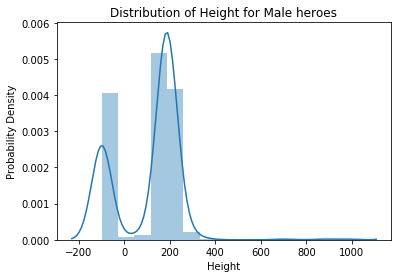

count    505.000000
mean     107.275248
std      144.435370
min      -99.000000
25%      -99.000000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64
The median height for male superheroes is: 180.0


In [109]:
# Male Height
show_distplot(male, 'Male', 'Height')
print(male['Height'].describe())
print(f"The median height for male superheroes is: {male['Height'].median()}")


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


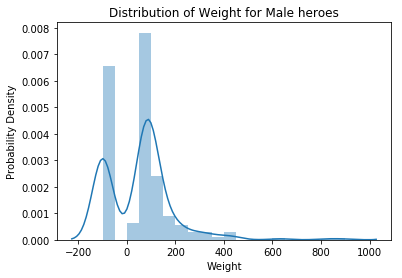

count    505.000000
mean      52.035357
std      139.075289
min      -99.000000
25%      -99.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64
The median height for male superheroes is: 79.0


In [110]:
# Male Weight
show_distplot(male, 'Male', 'Weight')
print(male['Weight'].describe())
print(f"The median height for male superheroes is: {male['Weight'].median()}")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


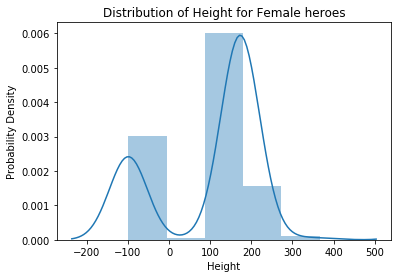

count    200.000000
mean      98.052500
std      124.819341
min      -99.000000
25%      -99.000000
50%      168.000000
75%      175.000000
max      366.000000
Name: Height, dtype: float64
The median height for female superheroes is: 168.0


In [111]:
# Female Height
show_distplot(female, 'Female', 'Height')
print(female['Height'].describe())
print(f"The median height for female superheroes is: {female['Height'].median()}")

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


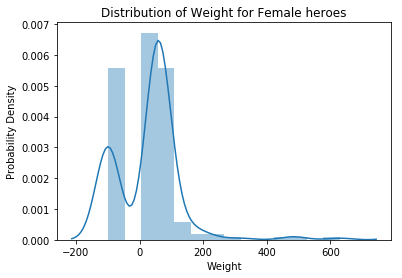

count    200.000000
mean      27.265000
std      103.648007
min      -99.000000
25%      -99.000000
50%       54.000000
75%       61.000000
max      630.000000
Name: Weight, dtype: float64
The median height for female superheroes is: 54.0


In [112]:
# Female Weight
show_distplot(female, 'Female', 'Weight')
print(female['Weight'].describe())
print(f"The median height for female superheroes is: {female['Weight'].median()}")

In [113]:
# All four of the graphs for the heights and weights of both male and female superheroes shows numerous things.
# First, all four graphs show bimodal distributions indicating that there are essentially two groups within each
# subset of both male and female heights and weights. This tells the reader that both male and female superheroes 
# fall under 'normal' heights/weights and significantly abnormal heights/weights. This makes sense given the
# extremely large standard deviations found for each. Also, both groups have large ranges due to extreme outliers
# for both male and female heights and weights.

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [117]:
merged.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
merged.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [143]:
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0})
        
    power_counts_dict = dict(df.sum())
    
    return sorted(power_counts_dict.items(), key=lambda x: x[1], reverse=True)[:5]

In [146]:
merged.fillna(False, inplace=True)

In [158]:
def find_top_powers(df):
    merged_cols = df.columns.tolist()[10:]
    powers = {}
    for col in merged_cols:
        if col not in powers:
            powers[col] = df[col].sum()
            
    return sorted(powers.items(), key=lambda x: x[1], reverse=True)


In [162]:
find_top_powers(merged)[:5]

[('Super Strength', 372),
 ('Stamina', 302),
 ('Durability', 268),
 ('Super Speed', 259),
 ('Agility', 251)]

In [164]:
find_top_powers(merged.loc[merged['Publisher'] == 'Marvel Comics'])[:5]

[('Super Strength', 204),
 ('Durability', 154),
 ('Stamina', 150),
 ('Super Speed', 137),
 ('Agility', 126)]

In [165]:
find_top_powers(merged.loc[merged['Publisher'] == 'DC Comics'])[:5]

[('Super Strength', 109),
 ('Stamina', 90),
 ('Flight', 86),
 ('Super Speed', 79),
 ('Agility', 71)]

In [ ]:
# Super Strength appears to be the number one most common power across the entire super hero universe. However,
# it appears that Marvel prefers 'durability' as the second most common super power while DC Comic prefers stamina.
# In addition, DC Comics appears to prefer superheroes with the power of flight moreso than Marvel comics does.
# Besides the differences in durability and flight, both marvel comics and DC prefer their superheroes to have speed,
# agility, and stamina.

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [166]:
find_top_powers(female)[:5]

[('Super Strength', 88),
 ('Stamina', 69),
 ('Agility', 66),
 ('Durability', 59),
 ('Super Speed', 58)]

In [168]:
find_top_powers(male)[:5]

[('Super Strength', 263),
 ('Stamina', 222),
 ('Durability', 196),
 ('Super Speed', 187),
 ('Agility', 173)]

In [176]:
test = merged.iloc[:,10:]

(758, 167)

In [180]:
test2 = test.apply(lambda s: test.corrwith(s))
test2.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.305039,0.031821,0.042721,0.122829,0.194999,0.412479,0.068512,0.033901,0.253818,...,0.139542,0.072191,0.073101,0.115193,0.051656,0.051656,-0.025573,0.073101,0.018455,0.018455
Accelerated Healing,0.305039,1.000000,-0.017585,0.135839,0.162889,0.286476,0.128857,0.174687,0.173134,0.262673,...,0.225081,0.151599,0.090520,0.176570,0.063965,-0.020652,0.063965,0.090520,0.090520,0.090520
Lantern Power Ring,0.031821,-0.017585,1.000000,-0.022411,-0.031901,0.002557,-0.056488,-0.041684,0.141697,-0.026297,...,-0.018380,-0.017819,-0.006242,-0.014031,-0.004411,-0.004411,-0.004411,-0.006242,-0.006242,-0.006242
Dimensional Awareness,0.042721,0.135839,-0.022411,1.000000,-0.048550,-0.028417,0.049187,0.128906,0.143047,0.031358,...,0.021917,0.538180,-0.009499,0.043390,-0.006712,-0.006712,-0.006712,-0.009499,0.278507,0.278507
Cold Resistance,0.122829,0.162889,-0.031901,-0.048550,1.000000,0.276916,0.059921,0.066852,-0.013695,0.020791,...,-0.039819,-0.001280,-0.013522,0.016625,-0.009555,-0.009555,-0.009555,-0.013522,-0.013522,-0.013522


In [181]:
male.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [194]:
merged

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441.000000,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65.000000,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90.000000,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441.000000,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99.000000,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,193,Marvel Comics,-,bad,122.000000,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,-99,NBC - Heroes,-,good,-99.000000,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,Male,blue,Human,Blond,185,DC Comics,-,good,88.000000,...,False,False,False,False,False,False,False,False,False,False
8,Agent 13,Female,blue,-,Blond,173,Marvel Comics,-,good,61.000000,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,Male,brown,Human,Brown,178,Marvel Comics,-,good,81.000000,...,False,False,False,False,False,False,False,False,False,False


In [195]:
male = merged.loc[merged['Gender'] == 'Male']
female = merged.loc[merged['Gender'] == 'Female']

In [196]:
male_powers = male.iloc[:,10:]
female_powers = female.iloc[:,10:]

In [199]:
male_powers_c = male_powers.apply(lambda s: male_powers.corrwith(s))
female_powers_c = female_powers.apply(lambda s: female_powers.corrwith(s))

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.283523,0.036336,0.101008,0.001791,0.152259,0.391945,0.099004,0.004311,0.290854,...,0.203555,0.101008,NaN,NaN,NaN,0.101008,NaN,NaN,NaN,NaN
Accelerated Healing,0.283523,1.000000,-0.048676,-0.034333,0.145976,0.413346,0.155296,0.060420,0.193494,0.291382,...,0.294963,-0.034333,NaN,NaN,NaN,-0.034333,NaN,NaN,NaN,NaN
Lantern Power Ring,0.036336,-0.048676,1.000000,-0.007125,-0.025392,-0.065013,-0.048676,-0.032563,0.165258,-0.020515,...,-0.014358,-0.007125,NaN,NaN,NaN,-0.007125,NaN,NaN,NaN,NaN
Dimensional Awareness,0.101008,-0.034333,-0.007125,1.000000,-0.017910,-0.045855,-0.034333,-0.022967,0.116561,-0.014470,...,-0.010127,1.000000,NaN,NaN,NaN,-0.005025,NaN,NaN,NaN,NaN
Cold Resistance,0.001791,0.145976,-0.025392,-0.017910,1.000000,0.252068,0.038641,0.133554,0.083464,0.055869,...,-0.036092,-0.017910,NaN,NaN,NaN,-0.017910,NaN,NaN,NaN,NaN


In [200]:
male_powers_c.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.297047,0.028915,0.016845,0.172988,0.195696,0.416008,0.038713,0.042131,0.242573,...,0.120963,0.077099,0.087353,0.136999,0.061706,NaN,-0.032154,0.061706,NaN,NaN
Accelerated Healing,0.297047,1.000000,-0.015430,0.117108,0.175500,0.241083,0.090477,0.195969,0.155685,0.249671,...,0.212906,0.136104,0.102831,0.199893,0.072640,NaN,0.072640,0.072640,NaN,NaN
Lantern Power Ring,0.028915,-0.015430,1.000000,-0.028059,-0.037320,0.015569,-0.063577,-0.046126,0.141719,-0.029425,...,-0.020101,-0.019146,-0.008494,-0.019146,-0.006000,NaN,-0.006000,-0.006000,NaN,NaN
Dimensional Awareness,0.016845,0.117108,-0.028059,1.000000,-0.057710,-0.043771,0.055873,0.090489,0.146791,0.002073,...,0.036869,0.468767,-0.013135,0.041590,-0.009278,NaN,-0.009278,-0.009278,NaN,NaN
Cold Resistance,0.172988,0.175500,-0.037320,-0.057710,1.000000,0.300492,0.068619,0.055789,-0.062199,0.013303,...,-0.041343,0.015861,-0.017470,0.015861,-0.012341,NaN,-0.012341,-0.012341,NaN,NaN


In [201]:
female_powers_c.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Agility,1.000000,0.283523,0.036336,0.101008,0.001791,0.152259,0.391945,0.099004,0.004311,0.290854,...,0.203555,0.101008,NaN,NaN,NaN,0.101008,NaN,NaN,NaN,NaN
Accelerated Healing,0.283523,1.000000,-0.048676,-0.034333,0.145976,0.413346,0.155296,0.060420,0.193494,0.291382,...,0.294963,-0.034333,NaN,NaN,NaN,-0.034333,NaN,NaN,NaN,NaN
Lantern Power Ring,0.036336,-0.048676,1.000000,-0.007125,-0.025392,-0.065013,-0.048676,-0.032563,0.165258,-0.020515,...,-0.014358,-0.007125,NaN,NaN,NaN,-0.007125,NaN,NaN,NaN,NaN
Dimensional Awareness,0.101008,-0.034333,-0.007125,1.000000,-0.017910,-0.045855,-0.034333,-0.022967,0.116561,-0.014470,...,-0.010127,1.000000,NaN,NaN,NaN,-0.005025,NaN,NaN,NaN,NaN
Cold Resistance,0.001791,0.145976,-0.025392,-0.017910,1.000000,0.252068,0.038641,0.133554,0.083464,0.055869,...,-0.036092,-0.017910,NaN,NaN,NaN,-0.017910,NaN,NaN,NaN,NaN


In [224]:
female_powers_c.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,max_correlation
Agility,1.000000,0.283523,0.036336,0.101008,0.001791,0.152259,0.391945,0.099004,0.004311,0.290854,...,0.101008,0.0,0.0,0.0,0.101008,0.0,0.0,0.0,0.0,Stamina
Accelerated Healing,0.283523,1.000000,-0.048676,-0.034333,0.145976,0.413346,0.155296,0.060420,0.193494,0.291382,...,-0.034333,0.0,0.0,0.0,-0.034333,0.0,0.0,0.0,0.0,Longevity
Lantern Power Ring,0.036336,-0.048676,1.000000,-0.007125,-0.025392,-0.065013,-0.048676,-0.032563,0.165258,-0.020515,...,-0.007125,0.0,0.0,0.0,-0.007125,0.0,0.0,0.0,0.0,Energy Armor
Dimensional Awareness,0.101008,-0.034333,-0.007125,1.000000,-0.017910,-0.045855,-0.034333,-0.022967,0.116561,-0.014470,...,1.000000,0.0,0.0,0.0,-0.005025,0.0,0.0,0.0,0.0,Dimensional Awareness
Cold Resistance,0.001791,0.145976,-0.025392,-0.017910,1.000000,0.252068,0.038641,0.133554,0.083464,0.055869,...,-0.017910,0.0,0.0,0.0,-0.017910,0.0,0.0,0.0,0.0,Heat Resistance


In [226]:
male_powers_c.fillna(0, inplace=True)
male_powers_c['value'] = male_powers_c.T.apply(lambda x: x.nlargest(2).idxmin())

In [228]:
male_powers_c.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,value
Agility,1.000000,0.297047,0.028915,0.016845,0.172988,0.195696,0.416008,0.038713,0.042131,0.242573,...,0.077099,0.087353,0.136999,0.061706,0.0,-0.032154,0.061706,0.0,0.0,Reflexes
Accelerated Healing,0.297047,1.000000,-0.015430,0.117108,0.175500,0.241083,0.090477,0.195969,0.155685,0.249671,...,0.136104,0.102831,0.199893,0.072640,0.0,0.072640,0.072640,0.0,0.0,Stamina
Lantern Power Ring,0.028915,-0.015430,1.000000,-0.028059,-0.037320,0.015569,-0.063577,-0.046126,0.141719,-0.029425,...,-0.019146,-0.008494,-0.019146,-0.006000,0.0,-0.006000,-0.006000,0.0,0.0,Energy Armor
Dimensional Awareness,0.016845,0.117108,-0.028059,1.000000,-0.057710,-0.043771,0.055873,0.090489,0.146791,0.002073,...,0.468767,-0.013135,0.041590,-0.009278,0.0,-0.009278,-0.009278,0.0,0.0,Teleportation
Cold Resistance,0.172988,0.175500,-0.037320,-0.057710,1.000000,0.300492,0.068619,0.055789,-0.062199,0.013303,...,0.015861,-0.017470,0.015861,-0.012341,0.0,-0.012341,-0.012341,0.0,0.0,Heat Resistance


In [229]:
male_powers_c['value']

Agility                                Reflexes
Accelerated Healing                     Stamina
Lantern Power Ring                 Energy Armor
Dimensional Awareness             Teleportation
Cold Resistance                 Heat Resistance
Durability                       Super Strength
Stealth                          Weapons Master
Energy Absorption                 Energy Blasts
Flight                             Force Fields
Danger Sense                       Web Creation
Underwater breathing                Sub-Mariner
Marksmanship                     Weapons Master
Weapons Master                     Marksmanship
Power Augmentation                   Biokinesis
Animal Attributes        Animal Oriented Powers
Longevity                   Accelerated Healing
Intelligence                     Omnilingualism
Super Strength                       Durability
Cryokinesis                       Water Control
Telepathy                           Telekinesis
Energy Armor                 Lantern Pow

In [ ]:
# Finished January 8, 2019

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data